### DATA

In [64]:
import pandas as pd
file_path = "../../data/final_data.csv"
df = pd.read_csv(file_path)

In [65]:
# 1) 중첩된 리스트 레벨 하나 제거
def flatten_once(x):
    # x가 리스트이고, 그 안에 리스트가 하나만 들어있으면 그걸 꺼내고
    if isinstance(x, list) and len(x) == 1 and isinstance(x[0], list):
        return x[0]
    return x

df['조회일'] = df['조회일'].apply(flatten_once)

# 2) 리스트 내에서 중복 제거 (순서 유지)
def unique_list(seq):
    seen = set()
    out = []
    for item in seq:
        if item not in seen:
            seen.add(item)
            out.append(item)
    return out

df['조회일'] = df['조회일'].apply(lambda lst: unique_list(lst) if isinstance(lst, list) else lst)

# 3) 이제 explode 하면 중복 없이 한 번씩만 분리됨
df = df.explode('조회일', ignore_index=True)

print(df['조회일'].iloc[0])       # 중복 없이 플랫 리스트 확인

[Timestamp('2020-10-28 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-10 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-08 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-08-05 00:00:00'), Timestamp('2020-08-04 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-07-24 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-22 00:00:00'), Timestamp('2020-07-21 00:00:00'), Timestamp('2020-07-20 00:00:00'), Timestamp('2020-07-19 00:00:00'), Timestamp('2020-07-18 00:00:00'), Timestamp('20

In [66]:
import pandas as pd

# 예: df['조회일'] 의 한 셀이 [Timestamp(...), Timestamp(...), …] 인 경우
def timestamps_to_dates(val, as_string: bool = False):
    """
    - val이 리스트면 내부의 pandas.Timestamp를 date 또는 문자열로 변환
    - as_string=True 이면 'YYYY-MM-DD' 문자열로 반환
    """
    if not isinstance(val, list):
        return val
    if as_string:
        return [ts.strftime('%Y-%m-%d') for ts in val]
    else:
        return [ts.date() for ts in val]

# 1) date 객체로 변환
df['조회일'] = df['조회일'].apply(timestamps_to_dates)

# 2) 문자열로 변환하고 싶다면
# df['조회일'] = df['조회일'].apply(lambda x: timestamps_to_dates(x, as_string=True))

# 확인
print(df['조회일'].iloc[0])
# -> [datetime.date(2020, 10, 28), …]
print(type(df['조회일'].iloc[0][0]))
# -> <class 'datetime.date'>


[Timestamp('2020-10-28 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-10 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-08 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-08-05 00:00:00'), Timestamp('2020-08-04 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-07-24 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-22 00:00:00'), Timestamp('2020-07-21 00:00:00'), Timestamp('2020-07-20 00:00:00'), Timestamp('2020-07-19 00:00:00'), Timestamp('2020-07-18 00:00:00'), Timestamp('20

In [67]:
import re
import pandas as pd

# 정규표현식: Timestamp('…') 안의 날짜 문자열 캡처
pattern = r"Timestamp\('([^']+)'\)"

def parse_date_list(val):
    # 문자열이 아니면 그대로 반환
    if not isinstance(val, str):
        return val
    # 'YYYY-MM-DD HH:MM:SS' 형태의 문자열만 추출
    date_strs = re.findall(pattern, val)
    # pandas.Timestamp → 'YYYY-MM-DD' 문자열로 변환
    return [pd.to_datetime(s).strftime('%Y-%m-%d') for s in date_strs]

# 적용
df['조회일'] = df['조회일'].apply(parse_date_list)

# 확인
print(df['조회일'].iloc[0])          # -> ['2020-10-28', ...]
print(type(df['조회일'].iloc[0][0])) # -> <class 'str'>


['2020-10-28', '2020-08-30', '2020-08-29', '2020-08-26', '2020-08-11', '2020-08-10', '2020-08-09', '2020-08-08', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-04', '2020-08-03', '2020-08-02', '2020-08-01', '2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24', '2020-07-23', '2020-07-22', '2020-07-21', '2020-07-20', '2020-07-19', '2020-07-18', '2020-07-17', '2020-07-16', '2020-07-15', '2020-07-14', '2020-07-13', '2020-07-12', '2020-07-11', '2020-07-10', '2020-07-09', '2020-07-08', '2020-07-07', '2020-07-06', '2020-07-05', '2020-07-04', '2020-07-03', '2020-07-02', '2020-07-01', '2020-06-30', '2020-06-29', '2020-06-28', '2020-06-27', '2020-06-26', '2020-06-25', '2020-06-24', '2020-06-23', '2020-06-19', '2020-06-15', '2020-06-03', '2020-06-02']
<class 'str'>


In [26]:
df.to_csv("data_not_timestamp.csv", index=False, encoding="utf-8-sig")

In [68]:
rename_map = {
    "중복횟수": "상영일수",
}
df.rename(columns=rename_map, inplace=True)

columns = [
    "영화명",
    "조회일",
    "상영일수",
    "매출액증감",
    "관객수증감(전일대비)",
    "매출액",
    "총매출액",
    "매출액(점유율)",
    "관객수",
    "누적관객수",
    "스크린수",
    "스크린점유율",
    "상영횟수",
    "상영점유율",
    "날짜",
    "개봉일",
    "대표국적",
    "국적",
    "배급사",
    "등급",
    "장르",
    "감독",
    "제작사",
    "배우",
    "SCRNG_MOVIE_CO_seoul_list",
    "MOVIE_ADNC_CO_seoul_list",
    "EXPNDTR_PRICE_seoul_list",
    "POPLTN_PER_MOVIE_ADNC_CO_seoul_list",
    "MOVIE_ADNC_CO_SCORE_seoul_list",
    "EXPNDTR_PRICE_SCORE_seoul_list",
    "GNRLZ_SCORE_seoul_list",
    "STDR_SCRNG_MOVIE_CO_seoul_list",
    "STDR_MOVIE_ADNC_CO_seoul_list",
    "STDR_EXPNDTR_PRICE_seoul_list",
]


df = df[columns]

In [69]:
import pandas as pd
import ast
import math


# 1) 모든 값을 “리스트”로 통일
def to_list(x):
    # 문자열 → literal_eval 시도
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
        except (ValueError, SyntaxError):
            v = x
    else:
        v = x

    # 이미 리스트면 그대로
    if isinstance(v, list):
        return v
    # None 또는 NaN → 빈 리스트
    if v is None or (isinstance(v, float) and math.isnan(v)):
        return []
    # 그 외 스칼라값(숫자, Timestamp, 불리언 등) → 단일값 리스트
    return [v]

for col in columns:
    df[col] = df[col].apply(to_list)

# 2) 한 행 내 리스트 길이 동일하게 맞추기
def pad_row(row):
    # 각 리스트 길이 중 최대값
    lens = [len(row[c]) for c in columns]
    max_len = max(lens)
    for c in columns:
        lst = row[c]
        if len(lst) == max_len:
            continue
        if len(lst) == 0:
            row[c] = [None] * max_len
        elif len(lst) == 1:
            row[c] = lst * max_len
        else:
            # 길이 >1 이지만 max_len과 다르면 잘라내거나 None 패딩
            row[c] = lst[:max_len] if len(lst) > max_len else lst + [None]*(max_len - len(lst))
    return row

df = df.apply(pad_row, axis=1)

# 3) 한 번에 multi-column explode — 메모리 효율적!
df_exploded = df.explode(columns, ignore_index=True)

# # 4) 날짜형 컬럼 다시 datetime 변환
# df_exploded["날짜"] = pd.to_datetime(df_exploded["날짜"], errors="coerce")
# df_exploded["조회일"] = pd.to_datetime(df_exploded["조회일"], errors="coerce")

# 5) 최종 인덱스 리셋 (ignore_index=True 로 이미 처리됐지만, 안전차원)
df_exploded.reset_index(drop=True, inplace=True)

print(df_exploded.shape)
print(df_exploded.head())


(74207, 34)
     영화명         조회일 상영일수     매출액증감 관객수증감(전일대비)      매출액        총매출액  \
0  #살아있다  2020-10-28   58   2890000         289  2890000  3888193840   
1  #살아있다  2020-08-30   58  -1266000        -253  4445000  3888193840   
2  #살아있다  2020-08-29   58   3707000         742  5711000  3888193840   
3  #살아있다  2020-08-26   58   2004000         400  2004000  3888193840   
4  #살아있다  2020-08-11   58     39000           6    46000  3888193840   

   매출액(점유율)   관객수 누적관객수  ... SCRNG_MOVIE_CO_seoul_list  \
0  0.218345   289   142  ...                       283   
1  0.218345   889   142  ...                       296   
2  0.218345  1142   142  ...                       296   
3  0.218345   400   142  ...                       296   
4  0.218345     7   142  ...                       296   

  MOVIE_ADNC_CO_seoul_list EXPNDTR_PRICE_seoul_list  \
0                  1175638            10841504840.0   
1                  2113493            18682044969.0   
2                  2113493            186

In [70]:
df_exploded.to_csv("df_exploded.csv", index=False, encoding="utf-8-sig")

### model

In [44]:
import pandas as pd
file_path = "data_not_timestamp.csv"
df = pd.read_csv(file_path)

In [ ]:
rename_map = {
    "중복횟수": "상영일수",
}
df.rename(columns=rename_map, inplace=True)


In [46]:
columns = [
    "영화명",
    "조회일",
    "상영일수",
    "매출액증감",
    "관객수증감(전일대비)",
    "매출액",
    "총매출액",
    "매출액(점유율)",
    "관객수",
    "누적관객수",
    "스크린수",
    "스크린점유율",
    "상영횟수",
    "상영점유율",
    "날짜",
    "개봉일",
    "대표국적",
    "국적",
    "배급사",
    "등급",
    "장르",
    "감독",
    "제작사",
    "배우",
    "SCRNG_MOVIE_CO_seoul_list",
    "MOVIE_ADNC_CO_seoul_list",
    "EXPNDTR_PRICE_seoul_list",
    "POPLTN_PER_MOVIE_ADNC_CO_seoul_list",
    "MOVIE_ADNC_CO_SCORE_seoul_list",
    "EXPNDTR_PRICE_SCORE_seoul_list",
    "GNRLZ_SCORE_seoul_list",
    "STDR_SCRNG_MOVIE_CO_seoul_list",
    "STDR_MOVIE_ADNC_CO_seoul_list",
    "STDR_EXPNDTR_PRICE_seoul_list",
]


df = df[columns]

C:\Users\user\AppData\Local\Temp\ipykernel_28816\2198485633.py:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(ensure_list)


MSE: 279.81259968102074
R2 : 0.4075512319175598


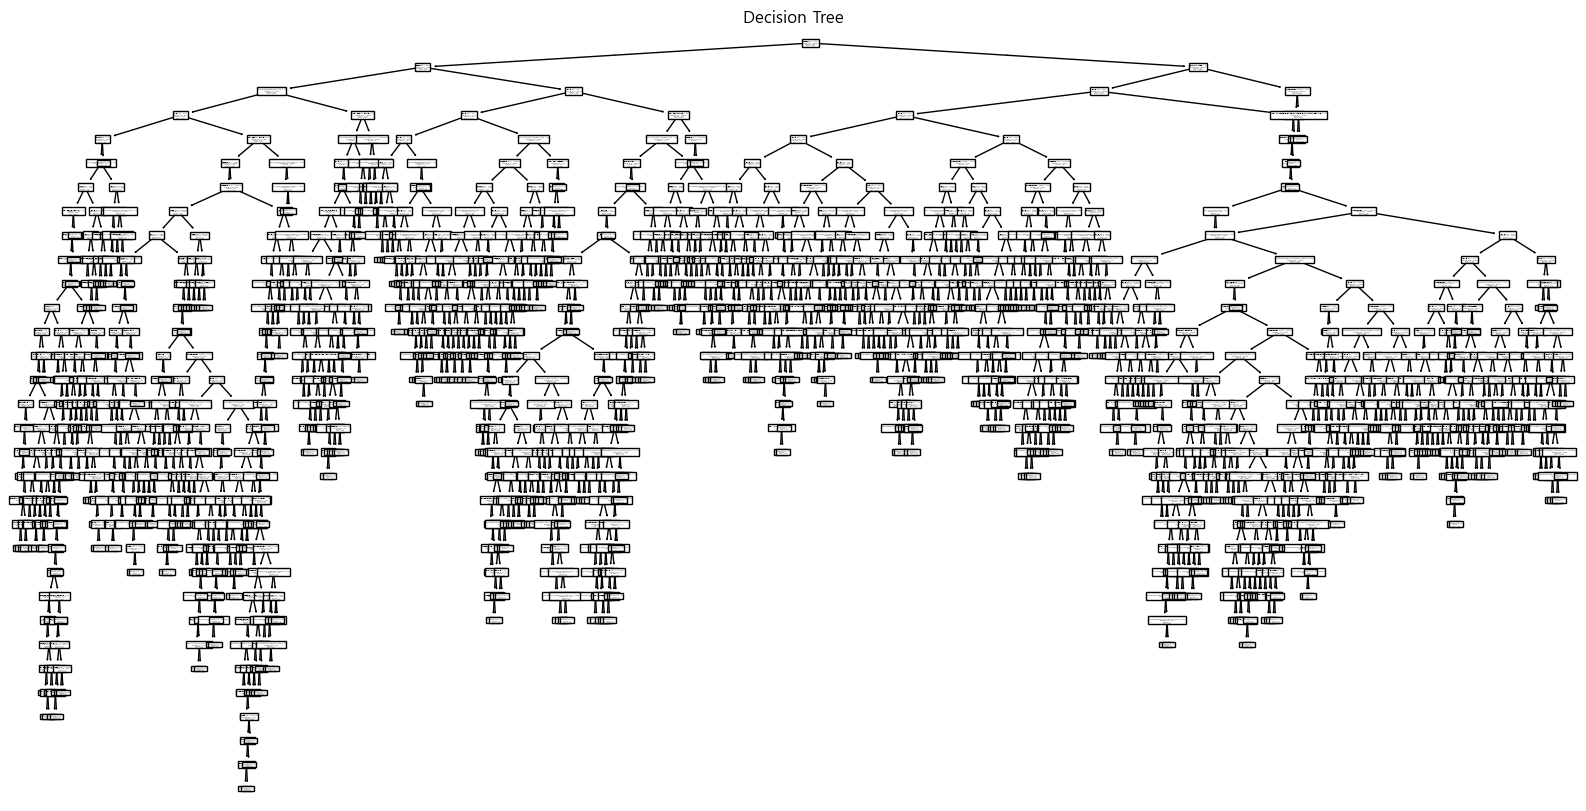

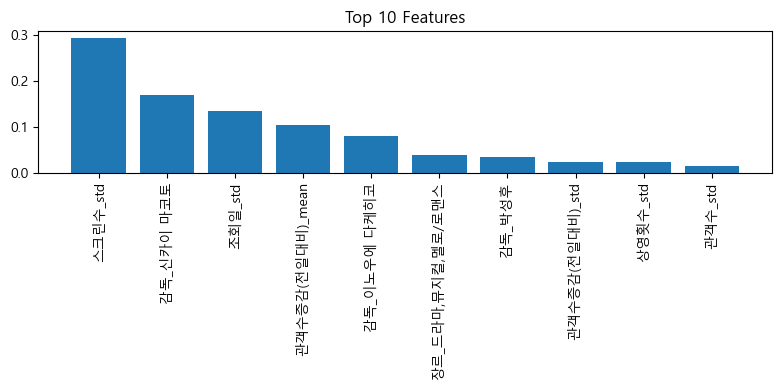

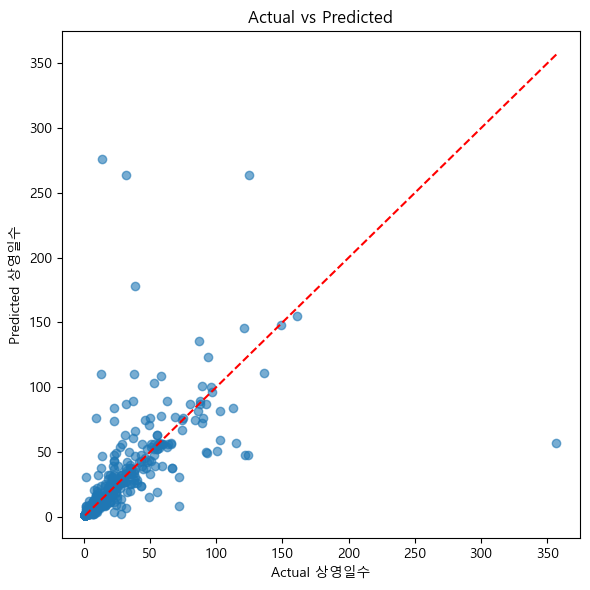

In [50]:
import ast
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 0) 유틸 함수들 ---
def ensure_list(val):
    """list이면 그대로, '[...]' 문자열이면 파싱, 아니면 그대로."""
    if isinstance(val, list):
        return val
    if isinstance(val, str) and val.strip().startswith('[') and val.strip().endswith(']'):
        try:
            return ast.literal_eval(val)
        except:
            return []
    return val

def to_ordinals(val):
    """날짜 문자열 리스트 → ordinal int 리스트 또는 단일 int."""
    items = val if isinstance(val, list) else [val]
    ords = []
    for x in items:
        try:
            dt = pd.to_datetime(x)
            ords.append(dt.to_pydatetime().toordinal())
        except:
            continue
    return ords if len(ords)>1 else (ords[0] if ords else np.nan)

def summarize_numeric_list(val):
    """숫자(문자열) 리스트 → (mean, std). 비리스트면 nan."""
    if not isinstance(val, list):
        return (np.nan, np.nan)
    nums = []
    for x in val:
        try:
            nums.append(float(x))
        except:
            continue
    if not nums:
        return (np.nan, np.nan)
    return (np.mean(nums), np.std(nums))

# --- 1) 타깃·피처 분리 ---
y = df['상영일수']
exclude = ["영화명","상영일수","총매출액","매출액(점유율)",
           "누적관객수","개봉일","대표국적","등급"]
X = df.drop(columns=exclude)

# --- 2) 모든 셀 → list 형태 보장 ---
X = X.applymap(ensure_list)

# --- 3) 날짜 컬럼 ordinal 변환 ---
for col in ["조회일","날짜"]:
    X[col] = X[col].apply(to_ordinals)

# --- 4) 리스트형 컬럼 모두 요약(숫자 리스트 포함) ---
list_cols = [c for c in X.columns if isinstance(X[c].iloc[0], list)]
for c in list_cols:
    stats = X[c].apply(summarize_numeric_list)
    X[f"{c}_mean"] = stats.apply(lambda x: x[0])
    X[f"{c}_std"]  = stats.apply(lambda x: x[1])
X.drop(columns=list_cols, inplace=True)

# --- 5) 범주형 One‐Hot 인코딩 ---
cat_cols = ["국적","배급사","장르","감독","제작사","배우"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# --- 6) train/test 분리 & 모델 학습 ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# --- 7) 평가 & 시각화 ---
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=False)
plt.title('Decision Tree')
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)\
                    .sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar(importances.index, importances.values)
plt.xticks(rotation=90)
plt.title('Top 10 Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual 상영일수'); plt.ylabel('Predicted 상영일수')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()


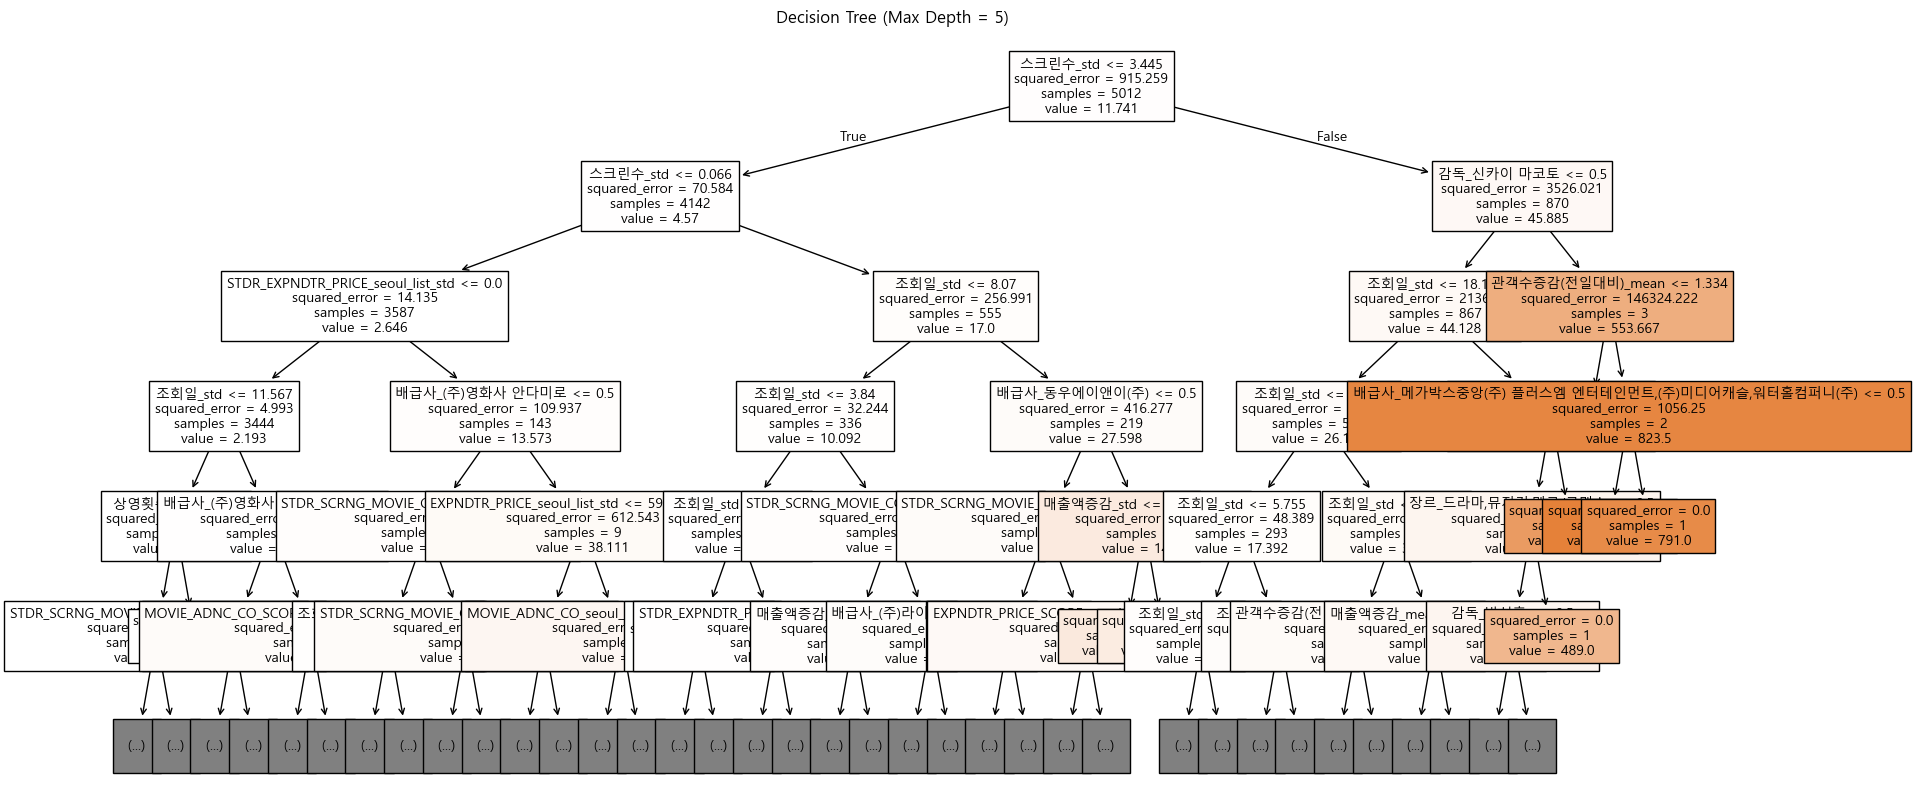

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,      # 노드를 색으로 구분하려면 True
    max_depth=5,      # 시각화할 최대 깊이 (0부터 시작, 5단계까지)
    fontsize=10       # 글자 크기 조정
)
plt.title('Decision Tree (Max Depth = 5)')
plt.show()


In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# 1) 테스트 세트 예측
y_pred = model.predict(X_test)

# 2) MSE, RMSE, R2
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.3f}")

# 3) (선택) 교차검증으로 RMSE 평균
# cv=5 로 5-겹 교차검증한 MSE 를 음수로 반환하므로, 부호를 바꿔 제곱근
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse   = np.sqrt(-cv_scores)

print(f"5-Fold CV RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")


MSE  : 279.81
RMSE : 16.73
R2   : 0.408
5-Fold CV RMSE: 24.07 ± 16.81


상영일수 3일 미만인 영화를 제거

In [57]:
df = df[df['상영일수'] >= 3]

C:\Users\user\AppData\Local\Temp\ipykernel_28816\2198485633.py:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(ensure_list)


MSE: 342.1666666666667
R2 : 0.5438154879211947


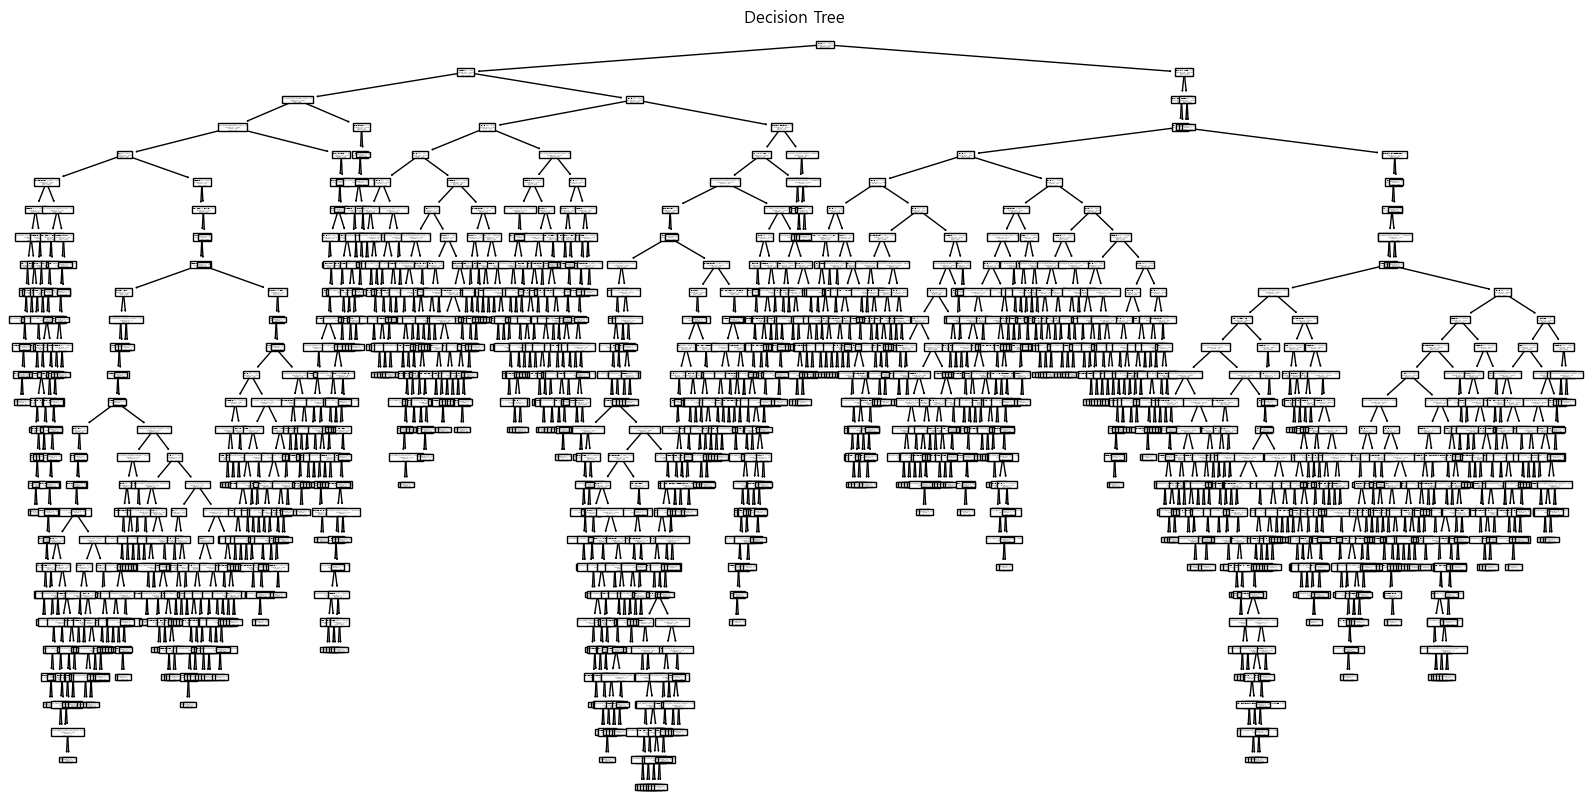

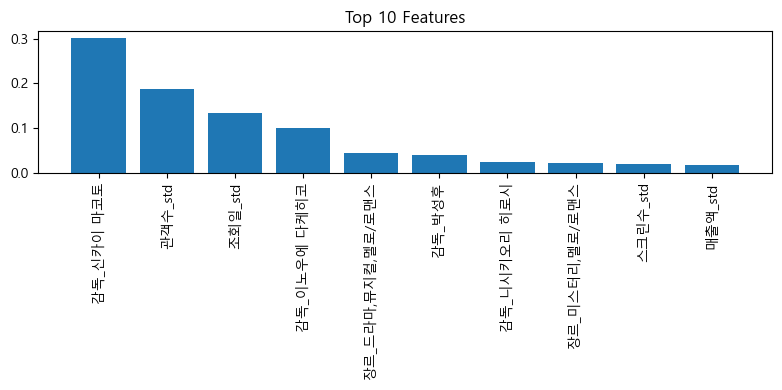

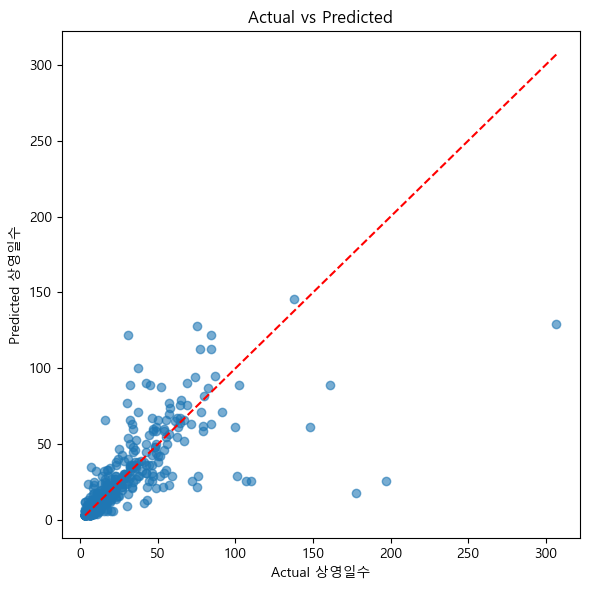

In [58]:
import ast
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 0) 유틸 함수들 ---
def ensure_list(val):
    """list이면 그대로, '[...]' 문자열이면 파싱, 아니면 그대로."""
    if isinstance(val, list):
        return val
    if isinstance(val, str) and val.strip().startswith('[') and val.strip().endswith(']'):
        try:
            return ast.literal_eval(val)
        except:
            return []
    return val

def to_ordinals(val):
    """날짜 문자열 리스트 → ordinal int 리스트 또는 단일 int."""
    items = val if isinstance(val, list) else [val]
    ords = []
    for x in items:
        try:
            dt = pd.to_datetime(x)
            ords.append(dt.to_pydatetime().toordinal())
        except:
            continue
    return ords if len(ords)>1 else (ords[0] if ords else np.nan)

def summarize_numeric_list(val):
    """숫자(문자열) 리스트 → (mean, std). 비리스트면 nan."""
    if not isinstance(val, list):
        return (np.nan, np.nan)
    nums = []
    for x in val:
        try:
            nums.append(float(x))
        except:
            continue
    if not nums:
        return (np.nan, np.nan)
    return (np.mean(nums), np.std(nums))

# --- 1) 타깃·피처 분리 ---
y = df['상영일수']
exclude = ["영화명","상영일수","총매출액","매출액(점유율)",
           "누적관객수","개봉일","대표국적","등급"]
X = df.drop(columns=exclude)

# --- 2) 모든 셀 → list 형태 보장 ---
X = X.applymap(ensure_list)

# --- 3) 날짜 컬럼 ordinal 변환 ---
for col in ["조회일","날짜"]:
    X[col] = X[col].apply(to_ordinals)

# --- 4) 리스트형 컬럼 모두 요약(숫자 리스트 포함) ---
list_cols = [c for c in X.columns if isinstance(X[c].iloc[0], list)]
for c in list_cols:
    stats = X[c].apply(summarize_numeric_list)
    X[f"{c}_mean"] = stats.apply(lambda x: x[0])
    X[f"{c}_std"]  = stats.apply(lambda x: x[1])
X.drop(columns=list_cols, inplace=True)

# --- 5) 범주형 One‐Hot 인코딩 ---
cat_cols = ["국적","배급사","장르","감독","제작사","배우"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# --- 6) train/test 분리 & 모델 학습 ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# --- 7) 평가 & 시각화 ---
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=False)
plt.title('Decision Tree')
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)\
                    .sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar(importances.index, importances.values)
plt.xticks(rotation=90)
plt.title('Top 10 Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual 상영일수'); plt.ylabel('Predicted 상영일수')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()


In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# 1) 테스트 세트 예측
y_pred = model.predict(X_test)

# 2) MSE, RMSE, R2
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.3f}")

# 3) (선택) 교차검증으로 RMSE 평균
# cv=5 로 5-겹 교차검증한 MSE 를 음수로 반환하므로, 부호를 바꿔 제곱근
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse   = np.sqrt(-cv_scores)

print(f"5-Fold CV RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")


MSE  : 342.17
RMSE : 18.50
R2   : 0.544
5-Fold CV RMSE: 36.77 ± 17.65


설명력 확인

In [60]:
from sklearn.metrics import r2_score

# 1) 일반 R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

# 2) Adjusted R²
n, p = X_test.shape
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R²: {adj_r2:.3f}")


R²: 0.544
Adjusted R²: 1.116


In [61]:
# Decision Tree 예시
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


감독_신카이 마코토           0.302017
관객수_std              0.187210
조회일_std              0.133548
감독_이노우에 다케히코         0.099620
장르_드라마,뮤지컬,멜로/로맨스    0.043636
감독_박성후               0.038815
감독_니시키오리 히로시         0.023332
장르_미스터리,멜로/로맨스       0.020897
스크린수_std             0.018909
매출액_std              0.015887
dtype: float64


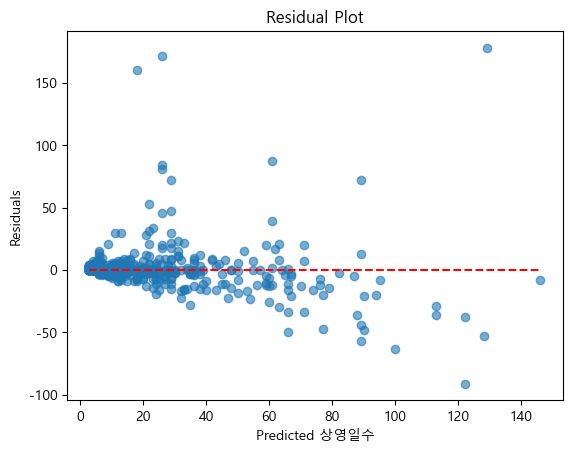

In [63]:
# 예: Residual Plot
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, y_pred.min(), y_pred.max(), 'r', '--')
plt.xlabel('Predicted 상영일수')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
